In [9]:
#import libraries

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.cluster  import KMeans
import warnings
warnings.filterwarnings('ignore')

In [17]:
df = pd.read_csv(r"C:\Users\senay\Desktop\AbsentData\Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## Univariate Analysis

In [19]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


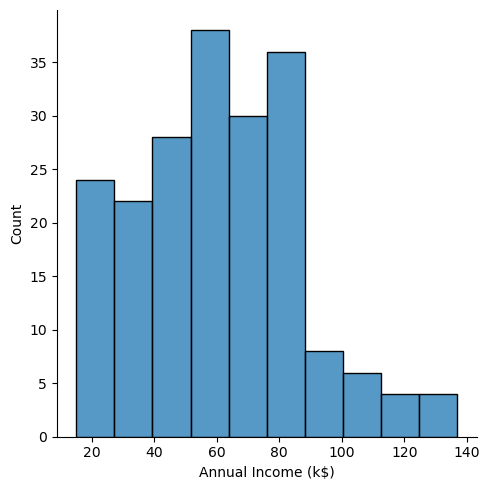

In [20]:
sns.displot(df['Annual Income (k$)'])

<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

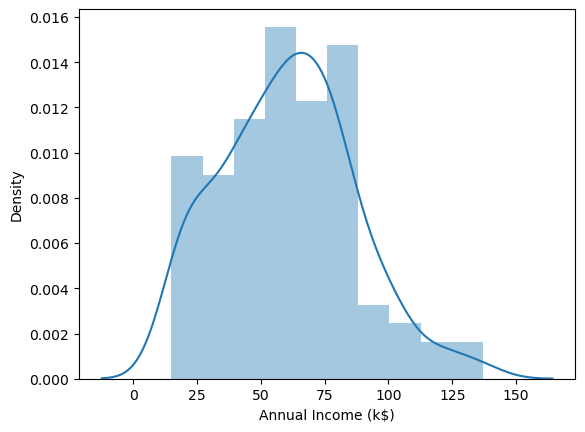

In [21]:
sns.distplot(df['Annual Income (k$)'])

In [22]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [23]:
columns = ['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']

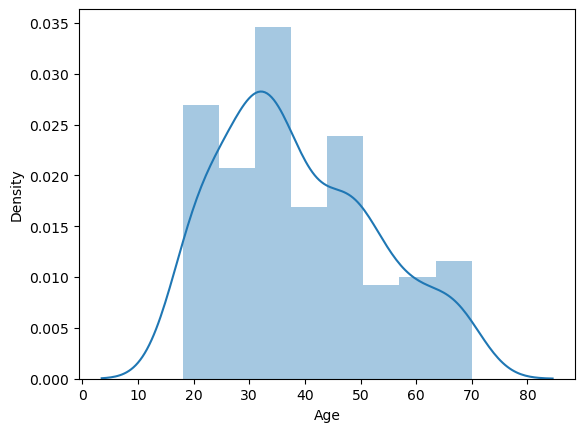

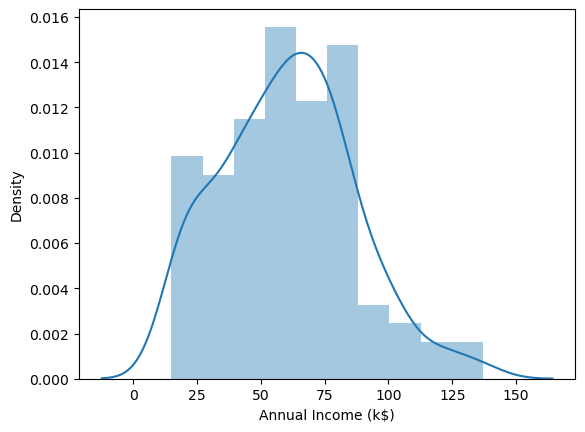

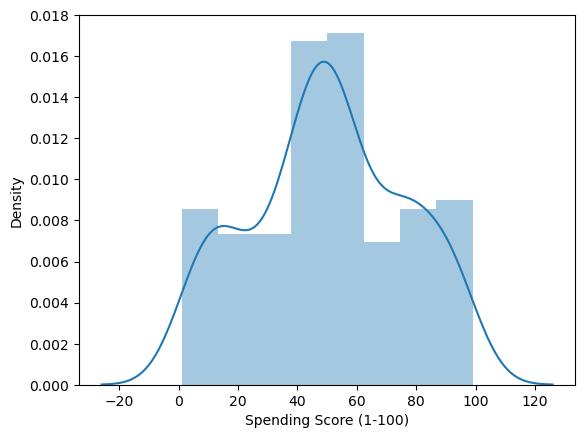

In [25]:
for i in columns: 
    plt.figure()
    sns.distplot(df[i])

In [33]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [43]:
# sns.kdeplot(df['Annual Income (k$)'], hue=df['Gender'], shade=True)

<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

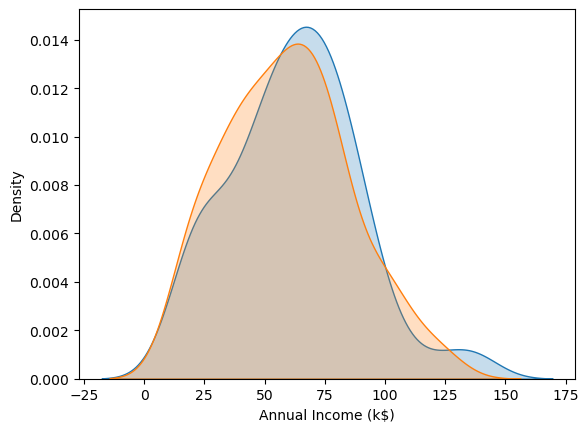

In [41]:
sns.kdeplot(data=df[df['Gender'] == 'Male']['Annual Income (k$)'], shade=True, label='Male')
sns.kdeplot(data=df[df['Gender'] == 'Female']['Annual Income (k$)'], shade=True, label='Female')


In [44]:
"""
columns = columns = ['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']

for i in columns: 
    plt.figure()
    sns.kdeplot(df[i], hue=df['Gender'], shade=True)
""";

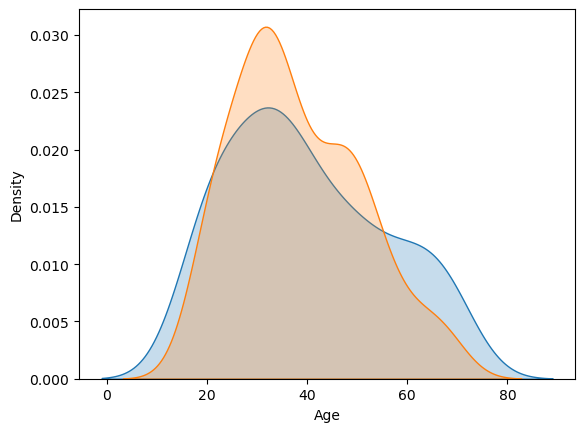

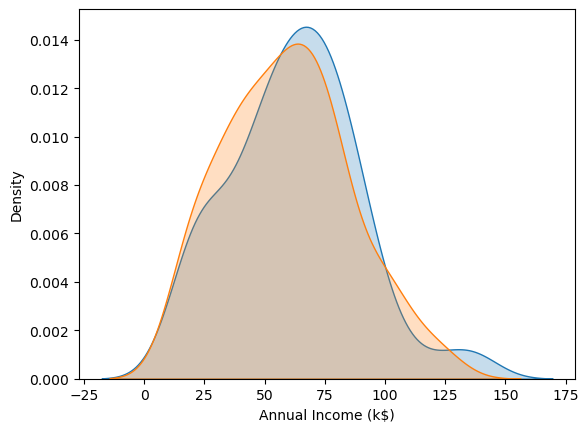

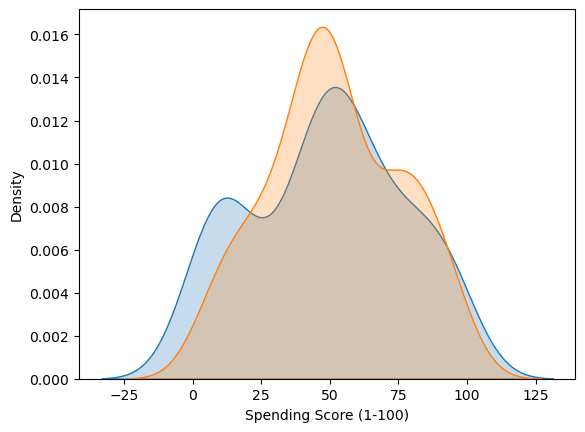

In [45]:
columns = columns = ['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']

for i in columns: 
    plt.figure()
    sns.kdeplot(data=df[df['Gender'] == 'Male'][i], shade=True, label='Male')
    sns.kdeplot(data=df[df['Gender'] == 'Female'][i], shade=True, label='Female')


In [46]:
df['Age']

0      19
1      21
2      20
3      23
4      31
       ..
195    35
196    45
197    32
198    32
199    30
Name: Age, Length: 200, dtype: int64

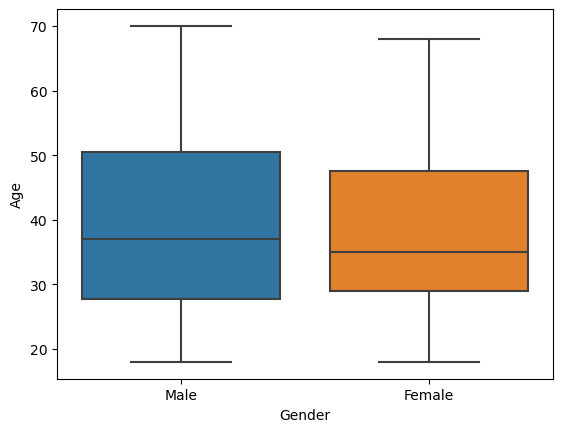

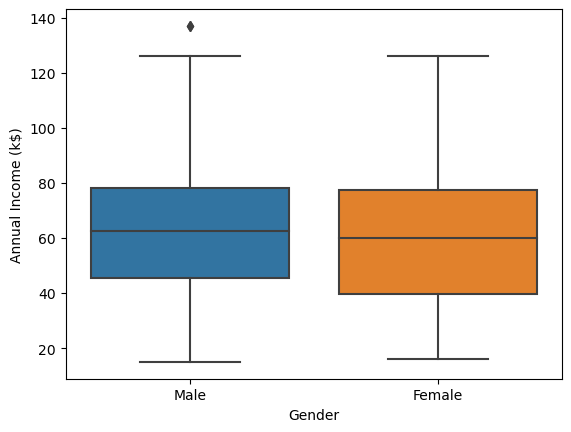

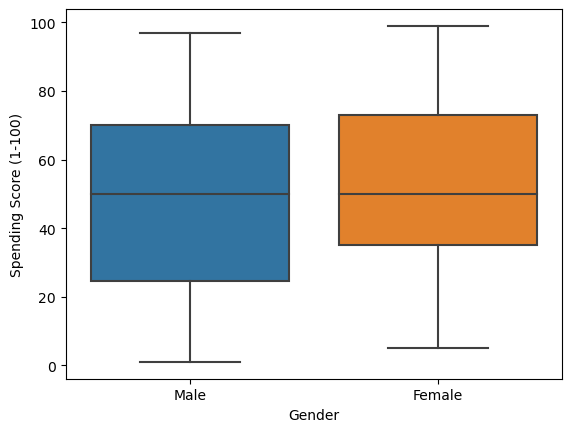

In [47]:
columns = columns = ['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']
for i in columns: 
    plt.figure()
    sns.boxplot(data=df, x='Gender', y=df[i])

In [48]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [49]:
df['Gender'].value_counts(normalize=True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

## Bivariate Analysis

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

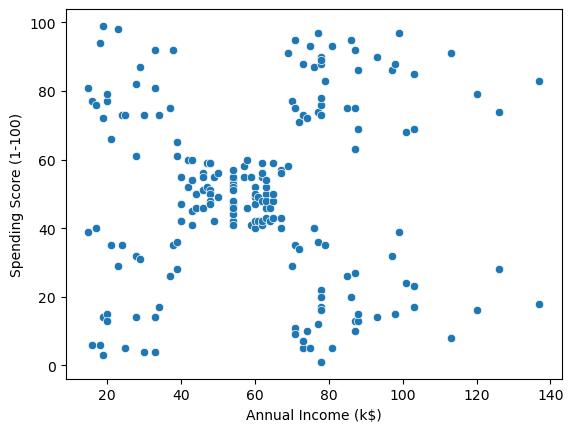

In [50]:
sns.scatterplot(data=df, x='Annual Income (k$)',y = 'Spending Score (1-100)')

In [52]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


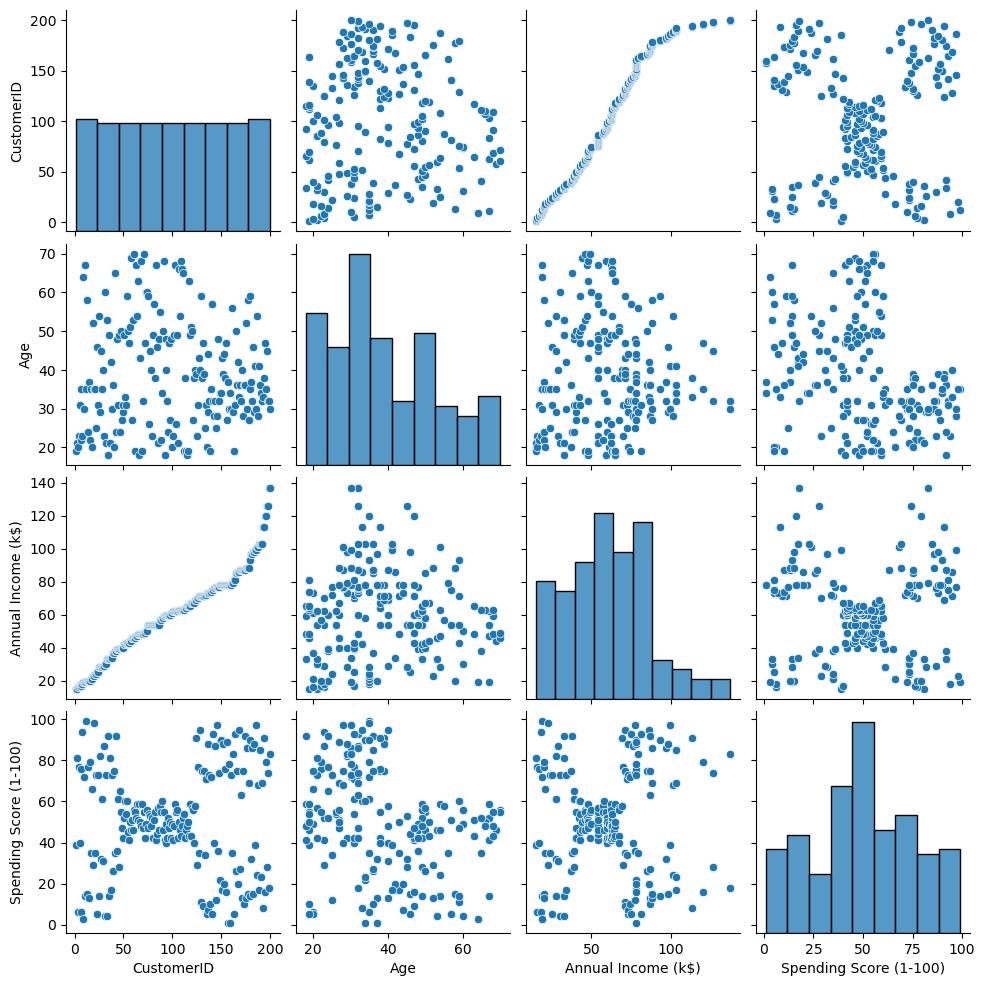

In [53]:
sns.pairplot(df)

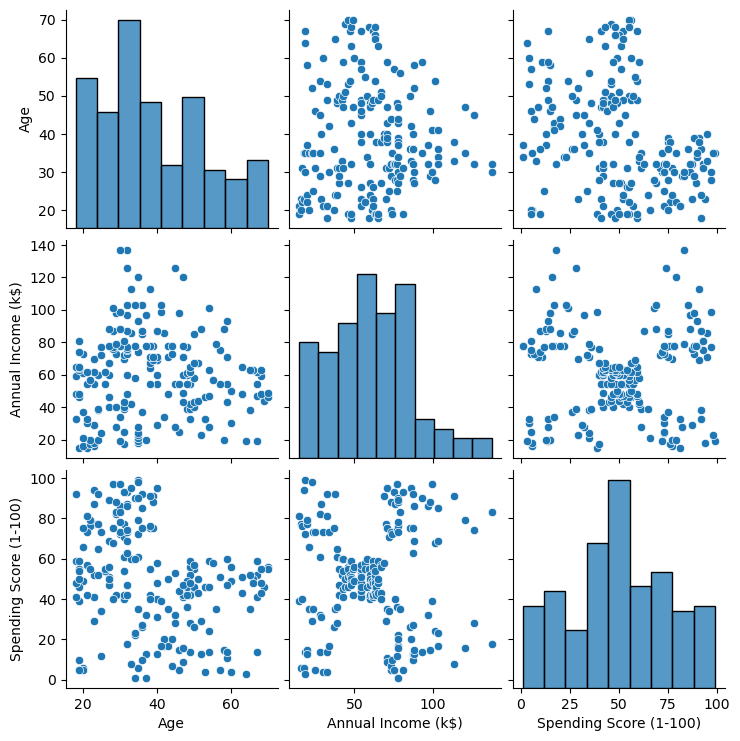

In [54]:
df=df.drop('CustomerID',axis=1)
sns.pairplot(df)

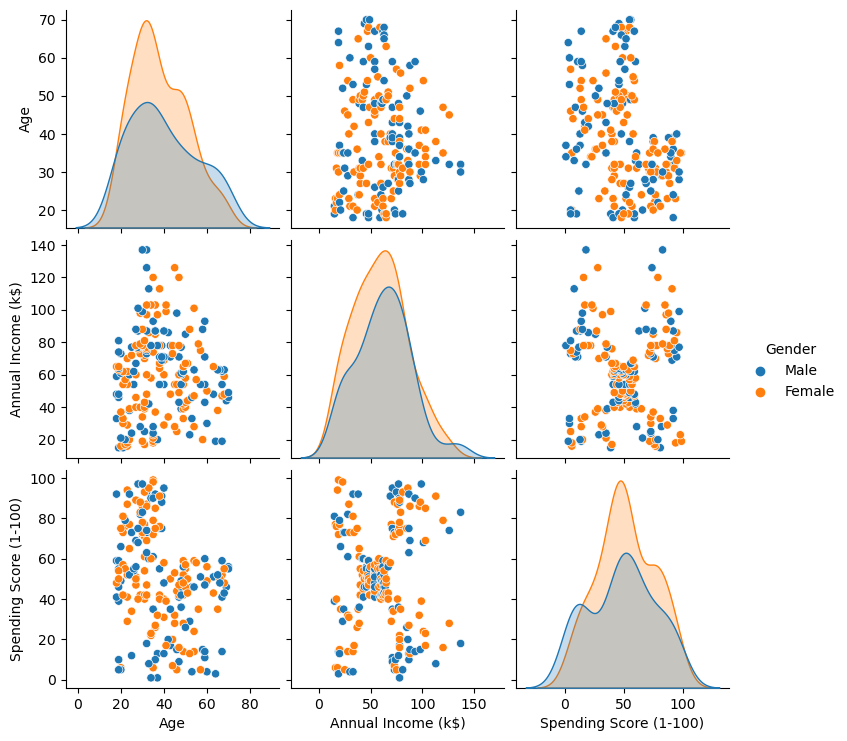

In [55]:
sns.pairplot(df,hue='Gender')

In [56]:
df.groupby(['Gender'])['Age', 'Annual Income (k$)',
       'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [57]:
df.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<Axes: >

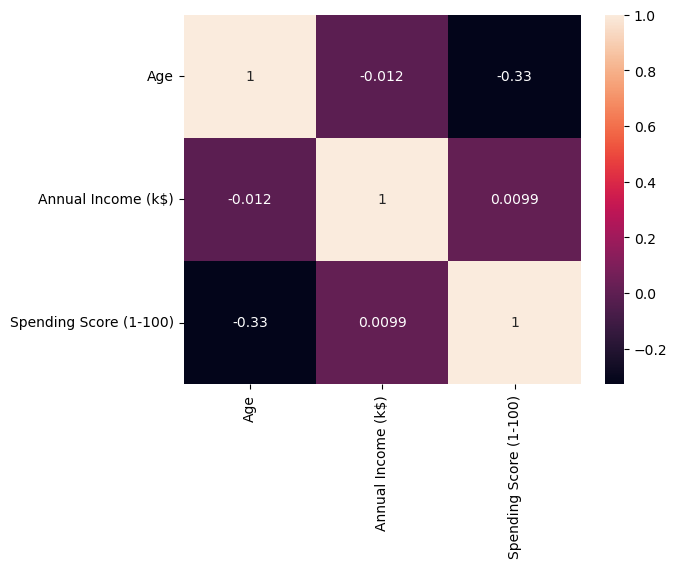

In [65]:
sns.heatmap(df.corr(), annot=True)

<Axes: >

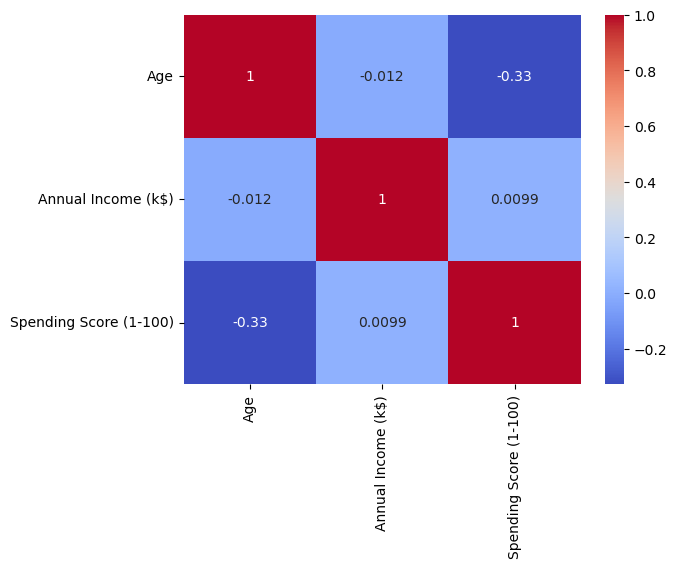

In [66]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

## Clustering-Univariate, Bivariate, Multivariate

### Univariate Clustering

In [86]:
clustering1 = KMeans(n_clusters=3)

In [87]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [88]:
clustering1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [89]:
df['Income Cluster']= clustering1.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,Male,19,15,39,1
1,Male,21,15,81,1
2,Female,20,16,6,1
3,Female,23,16,77,1
4,Female,31,17,40,1


In [90]:
df['Income Cluster'].value_counts()

2    90
1    74
0    36
Name: Income Cluster, dtype: int64

In [91]:
clustering1.inertia_

23517.330930930933

In [92]:
inertia_scores=[]
for i in range (1,11): 
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)

In [93]:
inertia_scores

[137277.27999999997,
 48660.88888888889,
 23528.15217391304,
 13278.112713472485,
 8481.496190476191,
 5050.904761904762,
 3936.796825396826,
 2822.4996947496948,
 2217.6406204906207,
 1743.4772727272725]

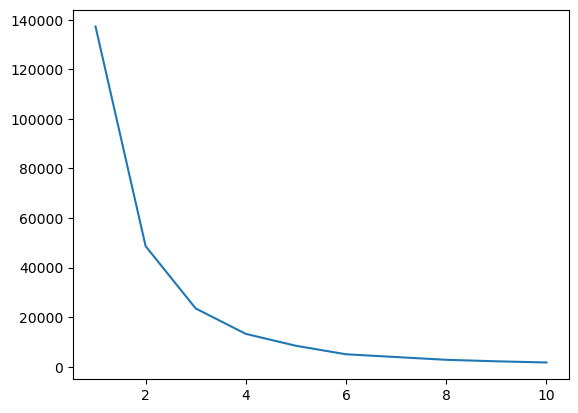

In [94]:
plt.plot(range(1,11),inertia_scores)

In [95]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster'],
      dtype='object')

In [96]:
df.groupby('Income Cluster')['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,37.833333,99.888889,50.638889
1,39.500000,33.486486,50.229730
2,38.722222,67.088889,50.000000


### Bivariate Clustering

In [103]:
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])

df['Spending and Income Cluster'] = clustering2.labels_

df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,1,1
1,Male,21,15,81,1,4
2,Female,20,16,6,1,1
3,Female,23,16,77,1,4
4,Female,31,17,40,1,1


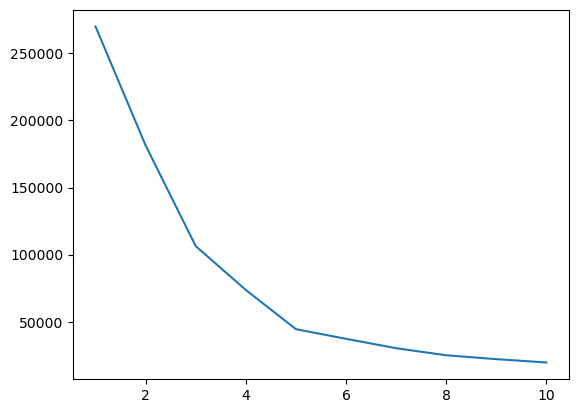

In [104]:
inertia_scores2=[]
for i in range(1,11): 
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    inertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11),inertia_scores2)

In [110]:
clustering2.cluster_centers_

array([[55.2962963 , 49.51851852],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636]])

In [113]:
centers=pd.DataFrame(clustering2.cluster_centers_)
centers.columns=['x','y']
centers

,x,y
0,55.296296,49.518519
1,26.304348,20.913043
2,88.200000,17.114286
3,86.538462,82.128205
4,25.727273,79.363636


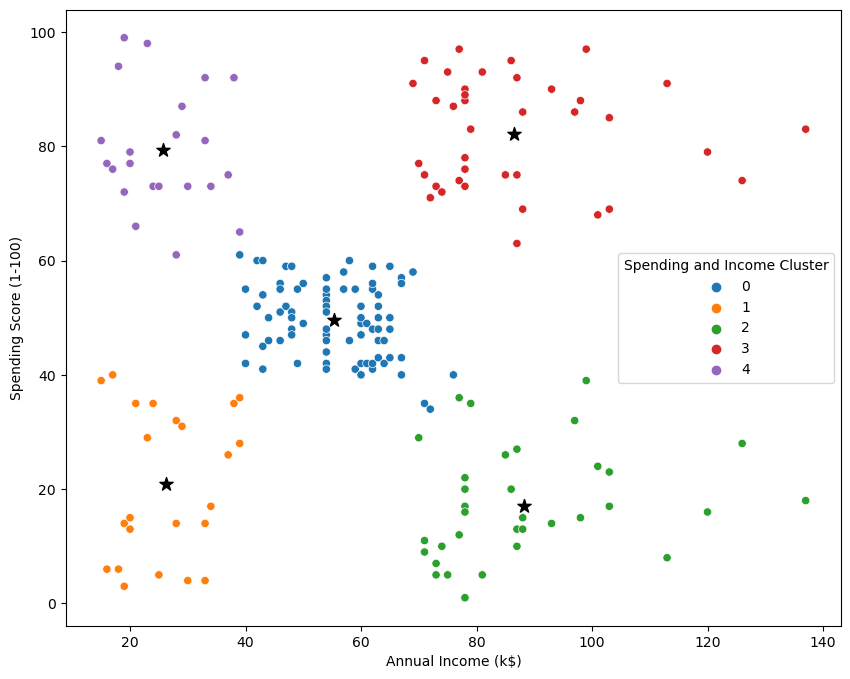

In [138]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'], y=centers['y'], s=100,c='black', marker='*')
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)',hue='Spending and Income Cluster', palette='tab10')


plt.savefig('clustering_bivariate.png')

In [118]:
pd.crosstab(df['Spending and Income Cluster'], df['Gender'])

Gender,Female,Male
Spending and Income Cluster,,
0,48,33
1,14,9
2,16,19
3,21,18
4,13,9


In [117]:
pd.crosstab(df['Spending and Income Cluster'], df['Gender'],normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.592593,0.407407
1,0.608696,0.391304
2,0.457143,0.542857
3,0.538462,0.461538
4,0.590909,0.409091


In [120]:
df.groupby('Spending and Income Cluster')['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,42.716049,55.296296,49.518519
1,45.217391,26.304348,20.913043
2,41.114286,88.200000,17.114286
3,32.692308,86.538462,82.128205
4,25.272727,25.727273,79.363636


## Multivariate Clustering

In [122]:
from sklearn.preprocessing import StandardScaler

In [123]:
scale=StandardScaler()

In [124]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,1,1
1,Male,21,15,81,1,4
2,Female,20,16,6,1,1
3,Female,23,16,77,1,4
4,Female,31,17,40,1,1


In [126]:
dff= pd.get_dummies(df)
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Gender_Female,Gender_Male
0,19,15,39,1,1,0,1
1,21,15,81,1,4,0,1
2,20,16,6,1,1,1,0
3,23,16,77,1,4,1,0
4,31,17,40,1,1,1,0


In [127]:
dff= pd.get_dummies(df, drop_first=True)
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Gender_Male
0,19,15,39,1,1,1
1,21,15,81,1,4,1
2,20,16,6,1,1,0
3,23,16,77,1,4,0
4,31,17,40,1,1,0


In [128]:
dff.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Income Cluster',
       'Spending and Income Cluster', 'Gender_Male'],
      dtype='object')

In [129]:
dff = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [130]:
dff = scale.fit_transform(dff)

In [131]:
dff

array([[-1.42456879, -1.73899919, -0.43480148,  1.12815215],
       [-1.28103541, -1.73899919,  1.19570407,  1.12815215],
       [-1.3528021 , -1.70082976, -1.71591298, -0.88640526],
       [-1.13750203, -1.70082976,  1.04041783, -0.88640526],
       [-0.56336851, -1.66266033, -0.39597992, -0.88640526],
       [-1.20926872, -1.66266033,  1.00159627, -0.88640526],
       [-0.27630176, -1.62449091, -1.71591298, -0.88640526],
       [-1.13750203, -1.62449091,  1.70038436, -0.88640526],
       [ 1.80493225, -1.58632148, -1.83237767,  1.12815215],
       [-0.6351352 , -1.58632148,  0.84631002, -0.88640526],
       [ 2.02023231, -1.58632148, -1.4053405 ,  1.12815215],
       [-0.27630176, -1.58632148,  1.89449216, -0.88640526],
       [ 1.37433211, -1.54815205, -1.36651894, -0.88640526],
       [-1.06573534, -1.54815205,  1.04041783, -0.88640526],
       [-0.13276838, -1.54815205, -1.44416206,  1.12815215],
       [-1.20926872, -1.54815205,  1.11806095,  1.12815215],
       [-0.27630176, -1.

In [132]:
dff= pd.DataFrame(scale.fit_transform(dff))

In [133]:
dff

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405
...,...,...,...,...
195,-0.276302,2.268791,1.118061,-0.886405
196,0.441365,2.497807,-0.861839,-0.886405
197,-0.491602,2.497807,0.923953,1.128152
198,-0.491602,2.917671,-1.250054,1.128152


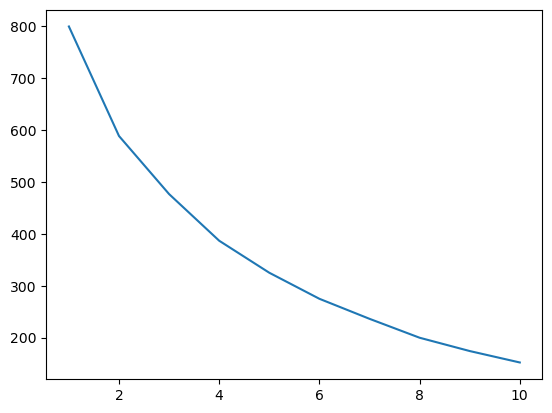

In [136]:
inertia_scores3 = []
for i in range(1,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(dff)
    inertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11), inertia_scores3)
    

In [137]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,1,1
1,Male,21,15,81,1,4
2,Female,20,16,6,1,1
3,Female,23,16,77,1,4
4,Female,31,17,40,1,1
...,...,...,...,...,...,...
195,Female,35,120,79,0,3
196,Female,45,126,28,0,2
197,Male,32,126,74,0,3
198,Male,32,137,18,0,2


In [139]:
df.to_csv('clustering.csv')

# Analysis 
## Target Cluster 
- Target group would be cluster 3 which has the combination of high Spending Score and high income 
- 54% of lcuster 3 shoppers are women . We should focus ways to attract these customers with marketing targeting popular items
- Cluster 4 presents an opportunity to market to customers for sales events on popular items. 